# Summing a large number of random variables.




In [82]:
# An example of the typical imports for data science notebook
# not all will be used here

# Import python standard library
import re, os, sys, time
import math
from pathlib import Path

# Import array and dataframe packages
import numpy as np
from numpy.random import default_rng
import pandas as pd

# Import ML & stats packages
import sklearn as sk
import scipy as sp     # for the binom(n,k) function

# Import the bokeh python wrappers for javascript plots
#  - a preferred visualization tool
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, VBar, Span
from bokeh.io import output_notebookoutput_notebook()

# Run the iterations up to n = 10
sample_max = 10

In [54]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [55]:
!ls '/content/drive/MyDrive/Colab Notebooks'

binomial_coefs_draft.ipynb  HW_3.ipynb			    Normal_simulation.ipynb
counting.ipynb		    linalg			    sample_10000mean.csv
extremes.ipynb		    loading_example_datasets.ipynb  Some_elaborations.ipynb


In [56]:
uniform_sample = [np.random.uniform() for _ in range(1000)]
uniform_sample_df = pd.DataFrame(uniform_sample)

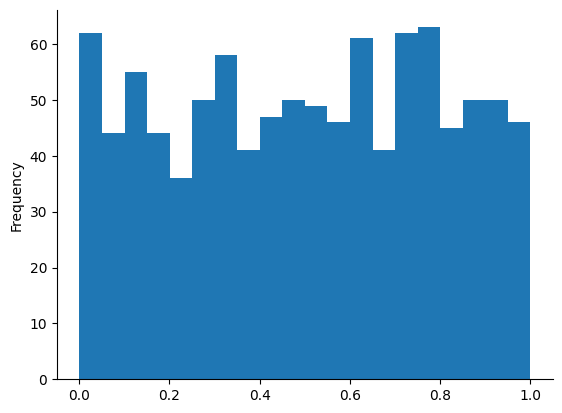

In [57]:
from matplotlib import pyplot as plt
uniform_sample_df[0].plot(kind='hist', bins=20, title=0)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [58]:
# Compute replications of replications of the mean of a uniform distribution
# (This is 1E8 samples - it takes a while to run, so we cache the results
#  and use the precomputed values. )


replications = 10000

def mean_replications(r = replications):
  return np.mean([np.random.uniform() for _ in range(r)])

sample_data_file = '/content/drive/MyDrive/Colab Notebooks/sample_10000mean.csv'

if Path(sample_data_file).is_file():
  sample_data = pd.read_csv(sample_data_file, sep = '\t', header=0, index_col= 0)

else:
  sample_data = [mean_replications() for s in range(replications)]

stats = sample_data.describe()['mean']  # because the column is named "mean"
stats


count    10000.000000
mean         0.500012
std          0.002874
min          0.489181
25%          0.498110
50%          0.499980
75%          0.501910
max          0.512106
Name: mean, dtype: float64

In [59]:
# Look at a few rows of the data
sample_data.head()

,mean
0,0.496886
1,0.499395
2,0.505420
3,0.502592
4,0.501227


In [61]:
# Histogram the data
normal_hist = np.histogram(sample_data, bins=200, density=True)
normal_hist_df = pd.DataFrame(dict(density=normal_hist[0], rv= normal_hist[1][:-1]))
normal_hist_df.head()

,density,rv
0,0.872392,0.489181
1,0.000000,0.489295
2,0.000000,0.489410
3,0.000000,0.489525
4,0.000000,0.489639


In [78]:
# Compare the sample mean and standard deviation with the expected standard deviation & mean
sample_mean = sample_data['mean'].mean()
sample_variance = np.square(sample_data['mean']).mean() - pow(predicted_mean, 2)
sample_standard_deviation = math.sqrt(sample_variance)
predicted_mean, sample_variance, sample_standard_deviation

(0.5000118345707917, 8.257922551713204e-06, 0.0028736601315592636)

In [79]:
# Compare these to the predicted values
uniform_variance = 1/12  # (b-a)^2 /12
predicted_variance = uniform_variance/replications
predicted_standard_deviation = math.sqrt(predicted_variance)
print(  'predicted_variance',  predicted_variance, 'predicted_standard_deviation', predicted_standard_deviation)
'error_in_mean', (sample_mean - 0.5)/0.5, 'error_in_standard_deviation', (sample_standard_deviation - predicted_standard_deviation)/predicted_standard_deviation

predicted_variance 8.333333333333332e-06 predicted_standard_deviation 0.0028867513459481286


('error_in_mean',
 2.3669141583360087e-05,
 'error_in_standard_deviation',
 -0.0045349296908581745)

In [109]:
lower_bound, upper_bound

(0.4971381744392324, 0.5028854947023509)

In [107]:
# Compute the distribution within plus-minus a standard deviation.
lower_bound = sample_mean - sample_standard_deviation
upper_bound = sample_mean + sample_standard_deviation

middle_density = normal_hist_df.loc[(normal_hist_df.rv > lower_bound) & (normal_hist_df.rv < upper_bound), :]
'Probability between minus & plus one standard deviation', middle_density.density.sum() * (middle_density.rv.iloc[2] - middle_density.rv.iloc[1])


('Probability between minus & plus one standard deviation', 0.6803000000001388)

In [114]:
# Compare this to the normal distribution density:
sp.stats.norm.cdf(1) - sp.stats.norm.cdf(-1)

0.6826894921370859

In [108]:


hist_src = ColumnDataSource(normal_hist_df)
middle_src = ColumnDataSource(middle_density)
p = figure(width = 1000, height = 300, title = '10,000 samples of the mean of 10,000 unit uniform r.v.s')

glyph = VBar(x='rv', top='density', bottom=0, width=0.0001, fill_color='limegreen')
p.add_glyph(hist_src, glyph)
glyph = VBar(x='rv', top='density', bottom=0, width=0.0001, fill_color='darkgreen')
p.add_glyph(middle_src, glyph)
lower_stddev = Span(location=lower_bound, dimension='height')
p.add_layout(lower_stddev)
upper_stddev = Span(location=upper_bound, dimension='height')
p.add_layout(upper_stddev)
show(p)